# 課題1
## 関数 $f(x) = x^3 + 2x^2 - 5x + 6$ がある

・f(x)を$-5 \leqq x \leqq 3$で図示せよ。

・初期値$x_0 = -3, 1$の二通りの場合において、ニュートン法を用いて$f(x) = 0$となる$x$を求めよ。

## 課題1-1

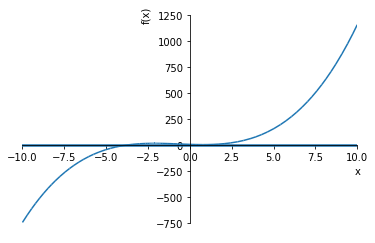

In [2]:
from sympy import *

x, y = symbols("x y")

def f(x) :
    return x**3 + 2*x**2 - 5*x + 6

plot(f(x), -5, 3)

# === 以下はnumpyとmatplotlibで行う場合
#import numpy as np
#from matplotlib import pyplot

#x1 = np.linspace(-5, 3, 100)
#y1 = f(x1)

#pyplot.plot(x1,y1)
#pyplot.show()


## 課題1-2

$f(x)$を微分し、閾値$10e-6$になるまで計算を繰り返す

まずは$x_0 = -3$の時を求める

In [3]:
# f(x)を微分する

df = diff(f(x))
x0 = -3

while True :
    x1 = x0 - f(x0)/df.subs(x, x0)
    if abs(f(x1)) < 10e-6 : 
        break
    x0 = x1

print(float(x1))  # 分数になるので、floatで変換
print(float(f(x1)))  # 同じ

-3.7563213575872454
-1.1838062181189844e-11


よって答えは

$ x = -3.7563213575872454 $

次に初期値が
$x_0 = 1$の時を求める

この初期値で計算を進めると循環してしまうため、初期値が不適である

In [4]:
x0 = 1
count = 0

while True :
    x1= x0 - f(x0)/df.subs(x, x0)
    if abs(f(x1)) < 10e-6 or count > 6 :
        break
    #print(float(x1))  
    #print(float(f(x1)))
    x0 = x1
    count += 1
    
print(float(x1))  # 分数になるので、floatで変換
print(float(f(x1)))  # 同じ

1.0
4.0


# 課題2
## 関数 $f_1(x) = x_1^2 + x_2^2 - 1 = 0$ , $ f_2(x) = x_1^3 - x_2 $ がある

・初期値$(x_1, x_2) = (1, 0.5)$とし、

ニュートン法を用いて$f(x) = 0$となる$x$を求めよ。

また、その時の途中解$x_k$と$f_1(x_k), f_2(x_k)$の値も記せ。

終了条件は$f_1(x_k) < 10^-6$ AND $f_2(x_k) < 10^-6$とする。

この問題は2次元なので、それぞれの式を偏微分する必要がある

In [6]:
x1, x2 = symbols("x1 x2")
count = 1

def f1(x1, x2) :
    return x1**2 + x2**2 - 1

def f2(x1, x2) :
    return x1**3 - x2

x10 = 1
x20 = 0.5

df1x1 = diff(f1(x1, x2), x1)
df1x2 = diff(f1(x1, x2), x2)
df2x1 = diff(f2(x1, x2), x1)
df2x2 = diff(f2(x1, x2), x2)

while True :
    x10, x20 = Matrix([[x10],[x20]]) \
    - Matrix([[df1x1.subs(x1, x10),df1x2.subs(x2, x20)],[df2x1.subs(x1, x10),df2x2.subs(x2, x20)]]).inv() \
    * Matrix([[f1(x10, x20)],[f2(x10, x20)]])
    print("x1{} = ".format(count) , x10)
    print("x2{} = ".format(count) , x20)
    print("f1(x1{0}, x2{0}) = ".format(count) , f1(x10,x20))
    print("f2(x1{0}, x2{0}) = ".format(count) , f2(x10,x20))
    print()
    if f1(x10,x20) < 10e-6 and f2(x10,x20) < 10e-6 :
        break
    count += 1

x11 =  0.850000000000000
x21 =  0.550000000000000
f1(x11, x21) =  0.0249999999999999
f2(x11, x21) =  0.0641249999999999

x12 =  0.826608312419661
x22 =  0.563423517169615
f1(x12, x22) =  0.000727361861059261
f2(x12, x22) =  0.00138248691782883

x13 =  0.826031686465398
x23 =  0.563624010888778
f1(x13, x23) =  3.72695222683461e-7
f2(x13, x23) =  8.24343843408570e-7



よって答えは

$x_1 = 0.826031686465398$

$x_2 = 0.563624010888778$